# Reuters dataset

## Importing dataset

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

print('Training data size -- ', len(train_data))
print('Test data size -- ', len(test_data))

Training data size --  8982
Test data size --  2246


### Exploring the data

In [6]:
word_index = reuters.get_word_index()
word_index_dict = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([word_index_dict.get(i - 3, '?') for i in train_data[0]])

print('Newswire -- ', decoded_newswire)
print('Associated label -- ', train_labels[0])

Newswire --  ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
Associated label --  3


## Preparing the data

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    
    for i, sequences in enumerate(sequences):
        result[i, sequences] = 1
    return result

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [8]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Building your network

### Smaller number of units compared to output space can cause bottleneck of information -- Use 64 units now

In [19]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

### Compile the model

In [20]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Create validation set

In [31]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Fit and obtain history of model

In [32]:
history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 237us/step - loss: 3.1798 - acc: 0.3653 - val_loss: 2.3913 - val_acc: 0.5130
Epoch 2/20
7982/7982 [==============================] - 1s 108us/step - loss: 1.9196 - acc: 0.6069 - val_loss: 1.6079 - val_acc: 0.6550
Epoch 3/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.3580 - acc: 0.7061 - val_loss: 1.3048 - val_acc: 0.6920
Epoch 4/20
7982/7982 [==============================] - 1s 110us/step - loss: 1.0656 - acc: 0.7607 - val_loss: 1.1493 - val_acc: 0.7550
Epoch 5/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.8499 - acc: 0.8161 - val_loss: 1.0515 - val_acc: 0.7740
Epoch 6/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.6737 - acc: 0.8599 - val_loss: 0.9740 - val_acc: 0.7940
Epoch 7/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.5267 - acc: 0.8949 - val_loss: 0.9170 - val_acc: 0.8100


## History

In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Plotting the training and validation loss

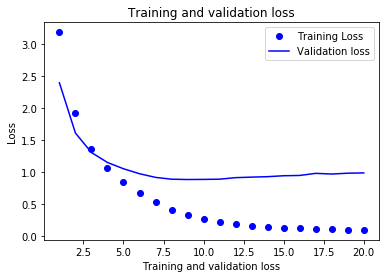

In [37]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Training and validation loss')
plt.ylabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the training and validation accuracy

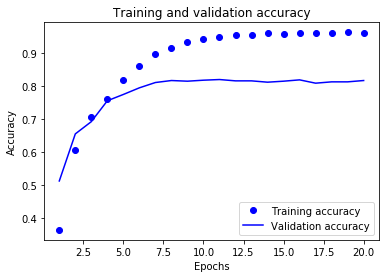

In [36]:
plt.clf() ## Clears the figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

(8982, 10000)